Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score ,accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

##  Data set exploration

In [7]:
dff=pd.read_csv("C:/Users/DELL/Desktop/diabetes.csv")
dff

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dff.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
dff.duplicated().sum()

np.int64(0)

In [11]:
dff.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
outcome                     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf5c06e270>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf5c06ddf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf5bdf3f80>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf5c06d820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf5c06d340>],
 'means': []}

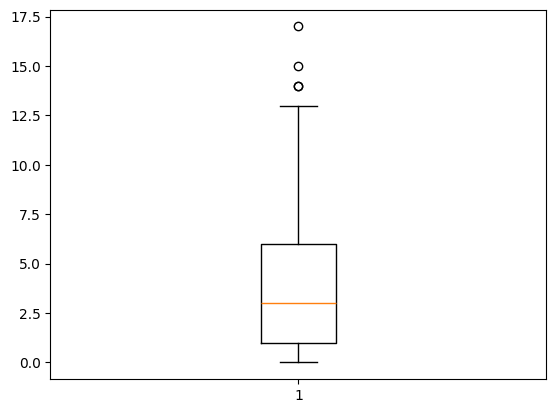

In [12]:
plt.boxplot(dff['Pregnancies'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf5c4e60f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf5c4e6660>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf5c06d4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf5c4e6b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf5c4e6db0>],
 'means': []}

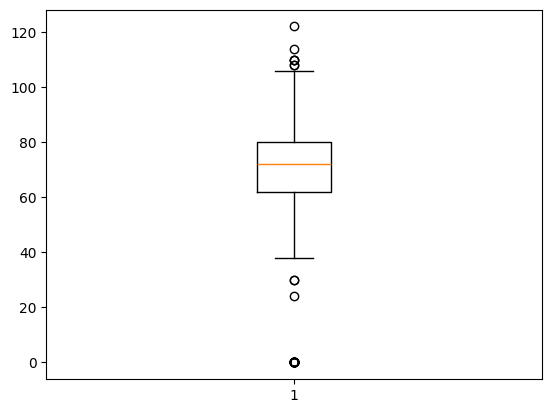

In [13]:
plt.boxplot(dff['BloodPressure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf5c564fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf5c5654f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf5c564dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf5c565a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf5c565d00>],
 'means': []}

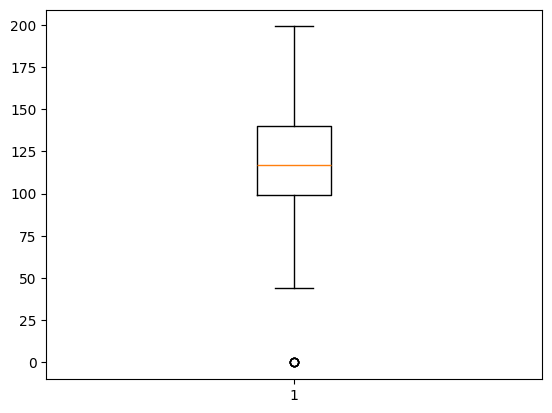

In [14]:
plt.boxplot(dff['Glucose'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf5c5c9c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf5c5ca210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf5c5c9a00>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf5c5ca750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf5c5ca9f0>],
 'means': []}

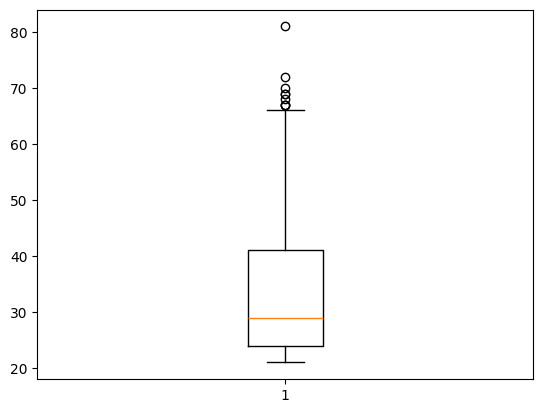

In [15]:
plt.boxplot(dff['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf5e65fe90>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf5e688470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf5e65fc20>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf5e688a40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf5e688cb0>],
 'means': []}

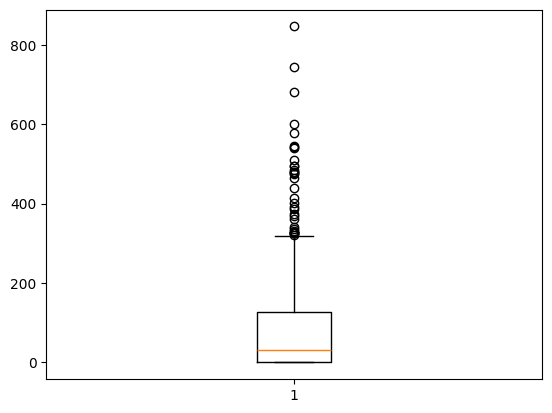

In [16]:
plt.boxplot(dff['Insulin'])

In [17]:

numerical_dff=dff.drop(dff['outcome'])
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

dff = remove_outliers_iqr(dff, numerical_dff)

In [18]:
dff.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.869497,72.007862,20.745283,69.017296,31.964151,0.426237,32.555031,0.309748
std,3.251388,28.996773,11.301102,15.231688,83.601857,6.384132,0.245088,10.879807,0.462754
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.238750,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,136.250000,80.000000,32.000000,122.000000,36.000000,0.583000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,330.000000,49.600000,1.162000,65.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1cf5e6dcf80>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf5e6dd520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf5e6dcda0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf5e6dd8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf5e6ddb80>],
 'means': []}

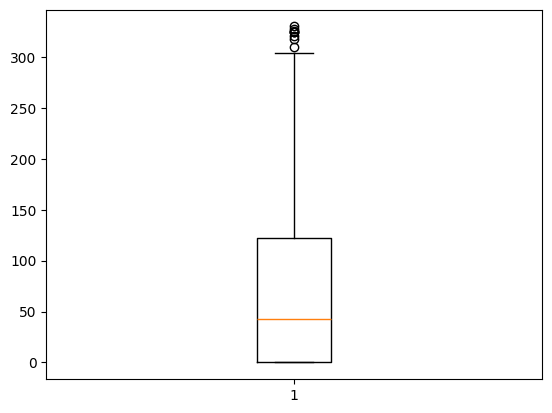

In [19]:
plt.boxplot(dff['Insulin'])

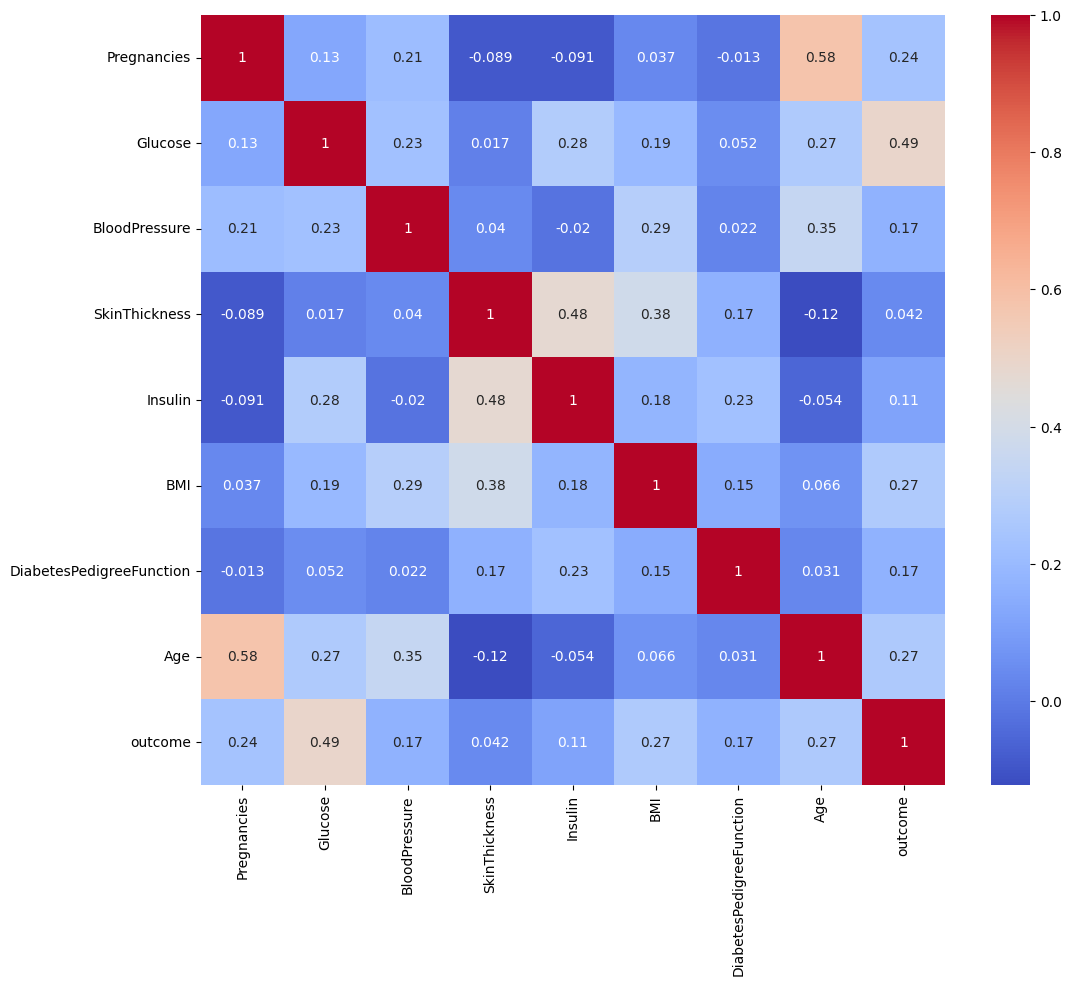

In [20]:
corr_matrix=dff.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Logistic

In [21]:
from sklearn.linear_model import LogisticRegression
X = dff.loc[:, dff.columns != 'outcome']
Y=dff['outcome']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
lr_multiple = LogisticRegression()
lr_multiple.fit(x_train, y_train)
y_pred = lr_multiple.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'R² Score: {accuracy:.2f}')

R² Score: 0.77


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
